In [64]:
import torch
import numpy as np
from matplotlib import pyplot as plt

In [65]:
a = torch.tensor(5, dtype=torch.float64, requires_grad=True)
b = torch.tensor(2, dtype=torch.float64, requires_grad=True)
c = torch.tensor(3, dtype=torch.float64, requires_grad=True)
d = torch.tensor(1, dtype=torch.float64, requires_grad=True)

In [66]:
e = a + b
f = c * d
e,f

(tensor(7., dtype=torch.float64, grad_fn=<AddBackward0>),
 tensor(3., dtype=torch.float64, grad_fn=<MulBackward0>))

In [67]:
g = e * f
g

tensor(21., dtype=torch.float64, grad_fn=<MulBackward0>)

In [68]:
g.backward()

In [69]:
a.grad,b.grad,c.grad,d.grad

(tensor(3., dtype=torch.float64),
 tensor(3., dtype=torch.float64),
 tensor(7., dtype=torch.float64),
 tensor(21., dtype=torch.float64))

In [70]:
def Clusters(n, cats, dims, spread):
    x = []
    y = []
    for i in range(cats):
        x.append(np.random.randn(n, dims) + np.random.randn(dims)*spread)
        y.append(np.array([np.arange(cats)] * n) == i)
    x = np.vstack(x)
    y = np.vstack(y)
    return x, y

x,y = Clusters(1000, 8, 2, 4)

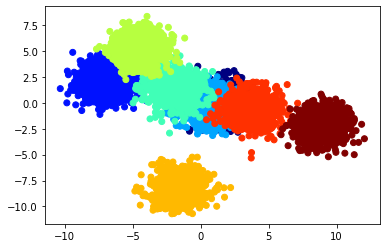

In [71]:
x = torch.tensor(x,dtype=torch.float32)
y = torch.tensor(y,dtype=torch.float32)
plt.scatter(x[:,0],x[:,1],c=np.argmax(y,axis=1),cmap='jet')

In [72]:
w = torch.randn((2,8), requires_grad = True)
b = torch.randn((1,8), requires_grad = True)

Loss = torch.nn.CrossEntropyLoss()

In [73]:
iterations = 1000
lr = 1e-4
for i in range(iterations):
    y_hat = x @ w + b
    J = Loss(y_hat,torch.argmax(y,dim=1))
    J.backward()
    w = w - w.grad * lr
    w = w.detach()
    w.requires_grad = True
    b = b - b.grad * lr
    b = b.detach()
    b.requires_grad = True

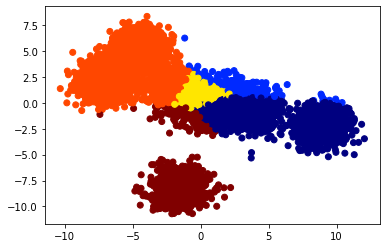

In [74]:
plt.scatter(x[:,0],x[:,1],c=torch.argmax((x @ w + b),dim=1),cmap='jet')

In [75]:
w = torch.randn((2,8), requires_grad = True)
b = torch.randn((1,8), requires_grad = True)
optim = torch.optim.Adam([w,b])

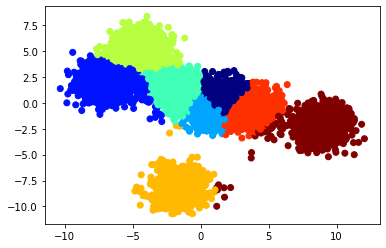

In [76]:
for i in range(4*iterations):
    y_hat = x @ w + b
    J = Loss(y_hat, torch.argmax(y,dim=1))
    J.backward()
    optim.step()
    optim.zero_grad()
plt.scatter(x[:,0],x[:,1],c=torch.argmax((x @ w + b),dim=1),cmap='jet')

In [86]:
class Layer(torch.nn.Module):
    def __init__(self, size_in, size_out, activation_func):
        super().__init__()
        self.w = torch.nn.Parameter(torch.randn(size_in,size_out, requires_grad = True))
        self.b = torch.nn.Parameter(torch.randn(1,size_out, requires_grad = True))
        self.activation_func = activation_func

    def forward(self, z_in):
        return self.activation_func(z_in @ self.w + self.b)

In [84]:
model = Layer(2,8,activation_func = lambda x: x)

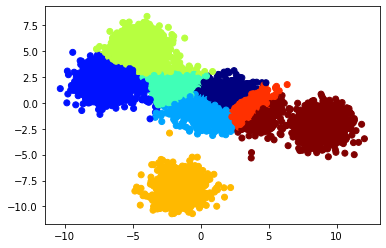

In [85]:
optim = torch.optim.Adam(model.parameters())
for i in range(4 * iterations):
    y_hat = model(x)
    J = Loss(y_hat, torch.argmax(y,dim=1))
    J.backward()
    optim.step()
    optim.zero_grad()
y_hat = torch.nn.Softmax(dim=1)(model(x))
plt.scatter(x[:,0],x[:,1],c=torch.argmax(y_hat,dim=1),cmap='jet')

In [92]:
class NN(torch.nn.Module):
    def __init__(self, size_in, size_out, out_func):
        super().__init__()
        self.out_func = out_func
        self.layers = torch.nn.ModuleList()

        self.layers.append(Layer(size_in, 16, torch.nn.Sigmoid()))
        self.layers.append(Layer(16, 8, lambda x: x))

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def predict(self, x):
        return self.out_func(self(x))

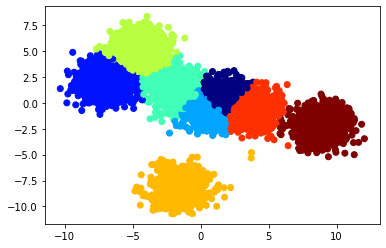

In [94]:
model = NN(2,8,torch.nn.Softmax(dim=1))
optim = torch.optim.Adam(model.parameters())
for i in range(4 * iterations):
    y_hat = model(x)
    J = Loss(y_hat, torch.argmax(y,dim=1))
    J.backward()
    optim.step()
    optim.zero_grad()
y_hat = torch.nn.Softmax(dim=1)(model(x))
plt.scatter(x[:,0],x[:,1],c=torch.argmax(y_hat,dim=1),cmap='jet')